# Run Distribution - CINCINNATI REDS

Data are taken from 2018 National League

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The transition matrix P can be written with a block structure.
We initialize these blocks.

In [2]:
A = np.zeros((8,8))
B = np.zeros((8,8))
C = np.zeros((8,8))
O = np.zeros((8,8))
D = np.zeros((8,1))
E = np.zeros((8,1))
F = np.zeros((8,1))

In [3]:
p_s = 0.1570
p_d = 0.0412
p_t = 0.0041
p_hr = 0.0282
p_w = 0.0918
p_out = 0.6777

p_sw = p_s + p_w

Let's check that the sum of these probabilities equals one

In [4]:
p_s+p_d+p_t+p_w+p_hr+p_out

1.0

Filling the blocks with the estimated probabilities

In [5]:
for i in range(0,8):
    A[i,0] = p_hr
    A[i,3] = p_t
    
A[0,1] = A[1,4] = p_sw
A[2,1] = A[3,1] = A[6,1] = A[4,4] = A[5,4] = A[7,4] = p_s
A[0,2] = A[2,2] = A[3,2] = A[6,2] = A[1,6] = A[4,6] = A[5,6] = A[7,6] = p_d
A[2,4] = A[3,5] = A[4,7] = A[5,7] = A[6,7] = A[7,7] = p_w
    

    
for i in range(0,8):
    B[i,i] = p_out

for i in range(0,8):
    F[i,0] = p_out

In [6]:
print(A)
print(B)
print(C)
print(O)
print(D)
print(E)
print(F)

[[ 0.0282  0.2488  0.0412  0.0041  0.      0.      0.      0.    ]
 [ 0.0282  0.      0.      0.0041  0.2488  0.      0.0412  0.    ]
 [ 0.0282  0.157   0.0412  0.0041  0.0918  0.      0.      0.    ]
 [ 0.0282  0.157   0.0412  0.0041  0.      0.0918  0.      0.    ]
 [ 0.0282  0.      0.      0.0041  0.157   0.      0.0412  0.0918]
 [ 0.0282  0.      0.      0.0041  0.157   0.      0.0412  0.0918]
 [ 0.0282  0.157   0.0412  0.0041  0.      0.      0.      0.0918]
 [ 0.0282  0.      0.      0.0041  0.157   0.      0.0412  0.0918]]
[[ 0.6777  0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.6777  0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.6777  0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.6777  0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.6777  0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.6777  0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.6777  0.

Building P

In [7]:
P = np.block([[A,B,C,D],[O,A,B,E],[O,O,A,F],[np.zeros((1,24)),1]])
print(P)

[[ 0.0282  0.2488  0.0412  0.0041  0.      0.      0.      0.      0.6777
   0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.    ]
 [ 0.0282  0.      0.      0.0041  0.2488  0.      0.0412  0.      0.
   0.6777  0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.    ]
 [ 0.0282  0.157   0.0412  0.0041  0.0918  0.      0.      0.      0.      0.
   0.6777  0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.    ]
 [ 0.0282  0.157   0.0412  0.0041  0.      0.0918  0.      0.      0.      0.
   0.      0.6777  0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.    ]
 [ 0.0282  0.      0.      0.0041  0.157   0.      0.0412  0.0918  0.      0.
   0.      0.      0.6777  0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.    ]
 

Making P stochastic

In [8]:
for i in range (0,25):
    my_sum = sum(P[i])
    for j in range (0,25):
        P[i,j] = P[i,j]/my_sum

Checking for correctness

In [9]:
for i in range(0,24):
    print(sum(P[i]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Building the R matrices (storing the number of runs scored via each transition)

In [10]:
R_A = np.zeros((8,8),int)
R_B = np.zeros((8,8),int)
R_C = np.zeros((8,8),int)
R_O = np.zeros((8,8),int)
R_D = np.zeros((8,1),int)
R_E = np.zeros((8,1),int)
R_F = np.zeros((8,1),int)

In [11]:
R_A[0,0] = 1
for i in range(1,4):
    R_A[i,0] = 2
for i in range(4,8):
    R_A[i,0] = 3
R_A[7,0] = 4
for i in range(1,4):
    R_A[1,i] = 1
    R_A[2,i] = 1
    R_A[3,i] = 1
    R_A[4,i] = 2
    R_A[5,i] = 2
    R_A[6,i] = 2
    R_A[7,i] = 3
for i in range(4,7):
    R_A[4,i] = 1
    R_A[5,i] = 1
    R_A[6,i] = 1
    R_A[7,i] = 2
R_A[7,7] = 1


for i in range(1,4):
    R_B[i,0] = 1
for i in range(4,8):
    R_B[i,0] = 2
R_B[7,0]=3
for i in range(1,4):
    R_B[4,i] = 1
    R_B[5,i] = 1
    R_B[6,i] = 1
    R_B[7,i] = 2
for i in range(4,7):
    R_B[7,i] = 1

    
for i in range(4,7):
    R_C[i,0] = 1
for i in range(1,4):
    R_C[7,i] = 1
R_C[7,0] = 2

In [12]:
print(R_A)
print(R_B)
print(R_C)

[[1 0 0 0 0 0 0 0]
 [2 1 1 1 0 0 0 0]
 [2 1 1 1 0 0 0 0]
 [2 1 1 1 0 0 0 0]
 [3 2 2 2 1 1 1 0]
 [3 2 2 2 1 1 1 0]
 [3 2 2 2 1 1 1 0]
 [4 3 3 3 2 2 2 1]]
[[0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [2 1 1 1 0 0 0 0]
 [2 1 1 1 0 0 0 0]
 [2 1 1 1 0 0 0 0]
 [3 2 2 2 1 1 1 0]]
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [2 1 1 1 0 0 0 0]]


Building R

In [13]:
R = np.block([[R_A,R_B,R_C,R_D],[R_O,R_A,R_B,R_E],[R_O,R_O,R_A,R_F],[np.zeros((1,24),int),0]])
print(R)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 2 2 2 1 1 1 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [3 2 2 2 1 1 1 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [3 2 2 2 1 1 1 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [4 3 3 3 2 2 2 1 3 2 2 2 1 1 1 0 2 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 2 2 2 1 1 1 0 2 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 2 2 2 1 1 1 0 2 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 2 2 2 1 1 1 0 2 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 3 3 3 2 2 2 1 3 2 2 2 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0 

Building the scoring matrices

In [14]:
P1 = np.zeros((25,25))
P2 = np.zeros((25,25))
P3 = np.zeros((25,25))
P4 = np.zeros((25,25))

In [15]:
for i in range (0,25):
    for j in range (0,25):
        if R[i,j] == 1:
            P1[i,j] = P[i,j]

for i in range (0,25):
    for j in range (0,25):
        if R[i,j] == 2:
            P2[i,j] = P[i,j]

for i in range (0,25):
    for j in range (0,25):
        if R[i,j] == 3:
            P3[i,j] = P[i,j]
            
for i in range (0,25):
    for j in range (0,25):
        if R[i,j] == 4:
            P4[i,j] = P[i,j]
    
P0 = P-(P1+P2+P3+P4)

PP = P0+P1+P2+P3+P4

Checking for correctness

In [16]:
#print(P0)
#print(P1)
#print(P2)
#print(P3)
#print(P4)
#print(PP)
P==PP

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],


Building and initializing U

In [17]:
U = np.zeros((21,25))
U[0,0] = 1
#print(U)

We define a tolerance. The algortihm stops when the sum of the final column of U is within tol of 1.

In [18]:
tol = 0.0001

In [19]:
def update_matrix(W):
    
    temp = np.zeros((21,25))
    
    for row in range (0,21):
        if row == 0:
            temp[row] = np.matmul(W[row],P0)
        if row == 1:
            temp[row] = np.matmul(W[row],P0) + np.matmul(W[row-1],P1)
        if row == 2:
            temp[row] = np.matmul(W[row],P0) + np.matmul(W[row-1],P1) + np.matmul(W[row-2],P2)
        if row == 3:
            temp[row] = np.matmul(W[row],P0) + np.matmul(W[row-1],P1) + np.matmul(W[row-2],P2) + np.matmul(W[row-3],P3)
        else:
            temp[row] = np.matmul(W[row],P0) + np.matmul(W[row-1],P1) + np.matmul(W[row-2],P2) + np.matmul(W[row-3],P3) + np.matmul(W[row-4],P4)
    
    W = temp
    
    return W

Iterating until the stopping criterion is reached

In [20]:
while (sum(U[:,24]) < 1-tol):
    U = update_matrix(U)

print(sum(U[:,24]))

0.9999435178


We extract the final column of U: this will give us the single-inning **run distribution**

In [21]:
U[:,24]

array([  7.50185178e-01,   1.26128828e-01,   6.67342690e-02,
         3.20658867e-02,   1.44307299e-02,   6.19456054e-03,
         2.56599991e-03,   1.03377863e-03,   4.07304925e-04,
         1.50127533e-04,   3.85740110e-05,   8.28055075e-06,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [22]:
runs = linspace(0,20,21,dtype=int)
print(runs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


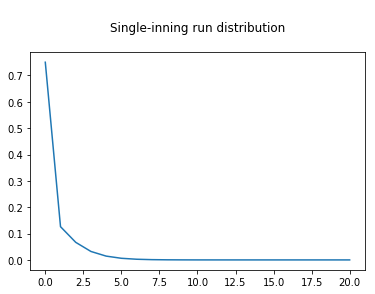

In [23]:
plot(runs, U[:,24])
_ = title("\nSingle-inning run distribution\n")

Computing the expected number of runs scored during an inning

In [24]:
UU = U[:,24]
for i in range (0,21):
    UU[i] = UU[i]*i
    
print(UU)
print("\nExpected number of runs: ")
print(sum(UU))

[  0.00000000e+00   1.26128828e-01   1.33468538e-01   9.61976602e-02
   5.77229198e-02   3.09728027e-02   1.53959995e-02   7.23645039e-03
   3.25843940e-03   1.35114779e-03   3.85740110e-04   9.10860582e-05
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]

Expected number of runs: 
0.472209612355
